In [13]:
#importation des librairies et du dataset
import pandas as pd
import numpy as np
import pycaret as py
import matplotlib.pyplot as plt
data = pd.read_csv('consommation_energetique.csv')
data.head()

,temperature (°C),humidite (%),vitesse_vent (km/h),jour_semaine,heure,type_habitation,nombre_personnes,consommation (kW)
0,6.854305,24.810634,NaN,Mercredi,NaN,Maison,1.0,0.817524
1,NaN,NaN,12.348940,Lundi,15.0,Bureau,5.0,NaN
2,NaN,79.835667,NaN,Vendredi,8.0,Bureau,3.0,2.081784
3,NaN,68.577991,NaN,Dimanche,11.0,Appartement,5.0,7.266092
4,-2.979161,74.524892,13.597486,Samedi,11.0,Maison,1.0,2.170958


In [14]:
#recherche des colonnes
data.columns

Index(['temperature (°C)', 'humidite (%)', 'vitesse_vent (km/h)',
       'jour_semaine', 'heure', 'type_habitation', 'nombre_personnes',
       'consommation (kW)'],
      dtype='object')

In [15]:
# types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperature (°C)     833 non-null    float64
 1   humidite (%)         852 non-null    float64
 2   vitesse_vent (km/h)  871 non-null    float64
 3   jour_semaine         875 non-null    object 
 4   heure                855 non-null    float64
 5   type_habitation      881 non-null    object 
 6   nombre_personnes     866 non-null    float64
 7   consommation (kW)    852 non-null    float64
dtypes: float64(6), object(2)
memory usage: 62.6+ KB


In [16]:
#nombre de lignes et de colonnes
data.shape

(1000, 8)

In [17]:
#trouver les lignes dupliquées
duplicates = data.duplicated()
duplicates

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [18]:
#analyse sommaire du dataset
data.describe()

,temperature (°C),humidite (%),vitesse_vent (km/h),heure,nombre_personnes,consommation (kW)
count,833.000000,852.000000,871.000000,855.000000,866.000000,852.000000
mean,11.706706,49.944426,25.059067,11.839766,3.008083,5.286457
std,13.144765,23.337619,14.463605,6.740163,1.418679,2.760649
min,-9.791559,10.257461,0.000582,0.000000,1.000000,0.537225
25%,0.107217,28.616510,13.272724,6.000000,2.000000,2.863643
50%,11.337822,50.588102,24.876993,12.000000,3.000000,5.282964
75%,23.078197,69.705491,37.712831,18.000000,4.000000,7.718970
max,34.987295,89.953098,49.891043,23.000000,5.000000,9.994876


In [19]:
#nous constatons que la colonne heure et jour de semaine n'a pas trop de question rapport avec les autres donnees donc elle sera supprimee
data = data.drop(["jour_semaine","heure"],axis = 1)
data

,temperature (°C),humidite (%),vitesse_vent (km/h),type_habitation,nombre_personnes,consommation (kW)
0,6.854305,24.810634,NaN,Maison,1.0,0.817524
1,NaN,NaN,12.348940,Bureau,5.0,NaN
2,NaN,79.835667,NaN,Bureau,3.0,2.081784
3,NaN,68.577991,NaN,Appartement,5.0,7.266092
4,-2.979161,74.524892,13.597486,Maison,1.0,2.170958
...,...,...,...,...,...,...
995,-5.878807,62.556413,43.264788,Bureau,NaN,3.783457
996,31.279111,86.529170,7.863660,Maison,1.0,8.173173
997,NaN,15.516641,15.489393,NaN,3.0,2.840308
998,32.760681,14.564378,14.502277,NaN,1.0,NaN


In [20]:
data = data.drop(["type_habitation"],axis = 1)
data

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes,consommation (kW)
0,6.854305,24.810634,NaN,1.0,0.817524
1,NaN,NaN,12.348940,5.0,NaN
2,NaN,79.835667,NaN,3.0,2.081784
3,NaN,68.577991,NaN,5.0,7.266092
4,-2.979161,74.524892,13.597486,1.0,2.170958
...,...,...,...,...,...
995,-5.878807,62.556413,43.264788,NaN,3.783457
996,31.279111,86.529170,7.863660,1.0,8.173173
997,NaN,15.516641,15.489393,3.0,2.840308
998,32.760681,14.564378,14.502277,1.0,NaN


In [21]:
#identification des donnees manquantes
data.isna().sum()

temperature (°C)       167
humidite (%)           148
vitesse_vent (km/h)    129
nombre_personnes       134
consommation (kW)      148
dtype: int64

In [22]:
#replacons les donnees manquantes par la moyenne
data["temperature (°C)"].fillna(data["temperature (°C)"].mean(), inplace=True)
data.isna().sum()

temperature (°C)         0
humidite (%)           148
vitesse_vent (km/h)    129
nombre_personnes       134
consommation (kW)      148
dtype: int64

In [23]:
data["humidite (%)"].fillna(data["humidite (%)"].mean(), inplace=True)
data.isna().sum()

temperature (°C)         0
humidite (%)             0
vitesse_vent (km/h)    129
nombre_personnes       134
consommation (kW)      148
dtype: int64

In [24]:
data["consommation (kW)"].fillna(data["consommation (kW)"].mean(), inplace=True)
data.isna().sum()

temperature (°C)         0
humidite (%)             0
vitesse_vent (km/h)    129
nombre_personnes       134
consommation (kW)        0
dtype: int64

In [25]:
data["nombre_personnes"].fillna(data["nombre_personnes"].mean(), inplace=True)
data.isna().sum()

temperature (°C)         0
humidite (%)             0
vitesse_vent (km/h)    129
nombre_personnes         0
consommation (kW)        0
dtype: int64

In [26]:
data["vitesse_vent (km/h)"].fillna(data["vitesse_vent (km/h)"].mean(), inplace=True)
data.isna().sum()

temperature (°C)       0
humidite (%)           0
vitesse_vent (km/h)    0
nombre_personnes       0
consommation (kW)      0
dtype: int64

<AxesSubplot: >

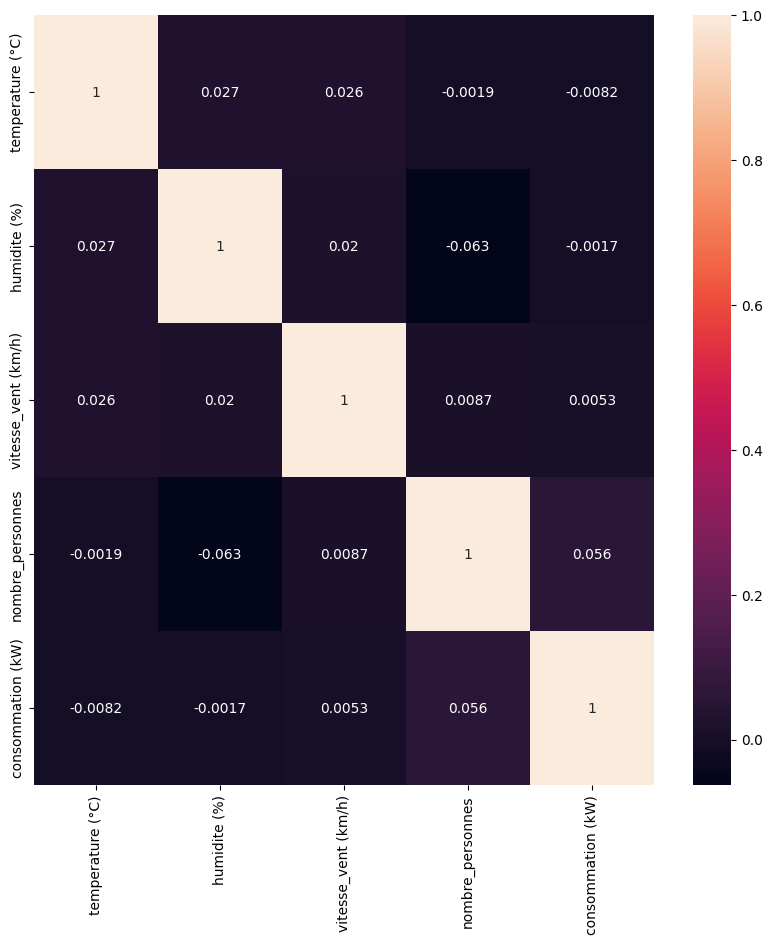

In [29]:
# visualisations des donnees 
#matrice de correletion
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(),annot=True)

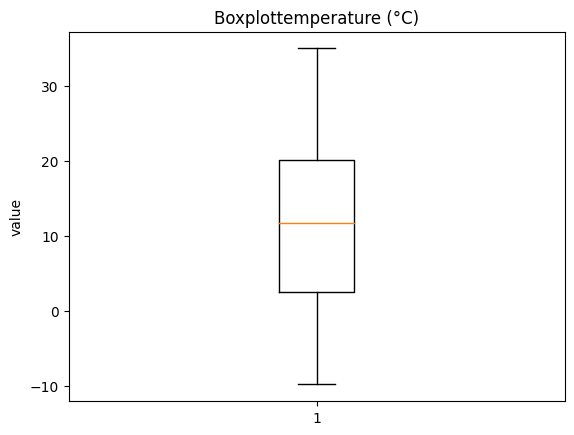

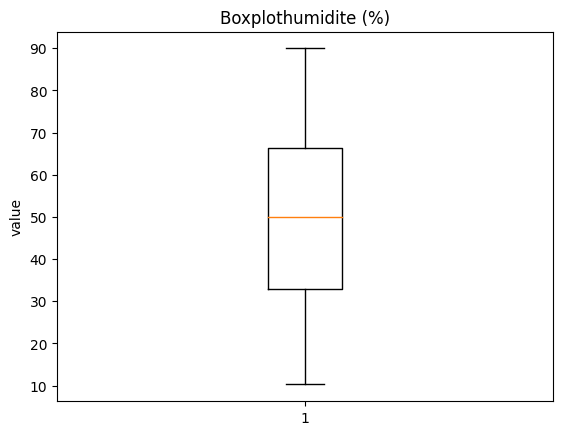

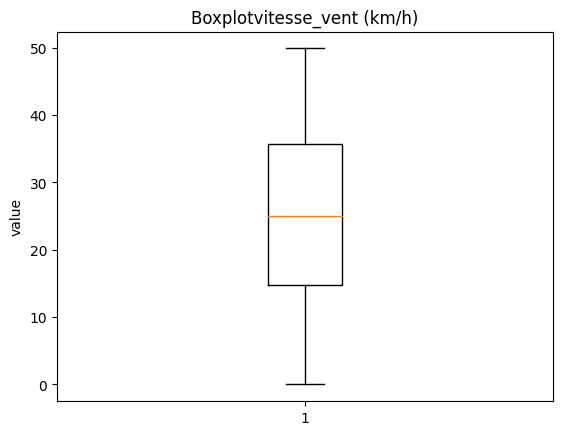

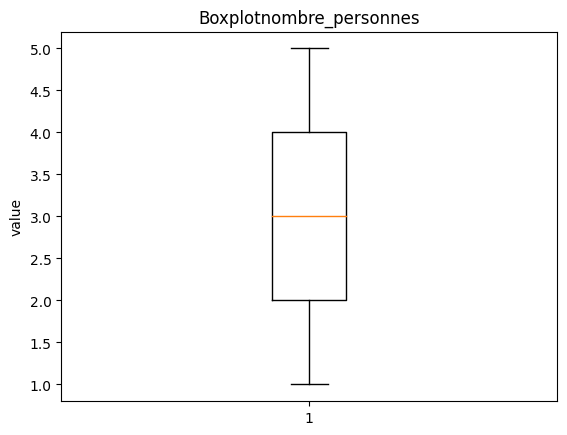

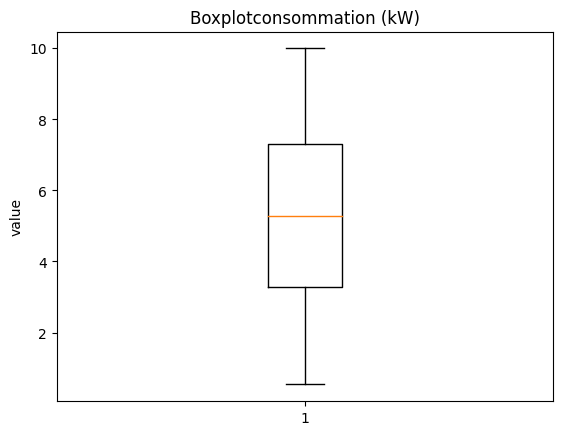

In [30]:
#visualisation des donnees a travers les boxplots et verifications des outliers
b = data.select_dtypes(include=['int','float'])
for i in b:
    plt.boxplot(data[i],data=data)
    plt.title(f'Boxplot{i}')
    plt.ylabel("value")
    plt.show()

In [31]:
data

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes,consommation (kW)
0,6.854305,24.810634,25.059067,1.000000,0.817524
1,11.706706,49.944426,12.348940,5.000000,5.286457
2,11.706706,79.835667,25.059067,3.000000,2.081784
3,11.706706,68.577991,25.059067,5.000000,7.266092
4,-2.979161,74.524892,13.597486,1.000000,2.170958
...,...,...,...,...,...
995,-5.878807,62.556413,43.264788,3.008083,3.783457
996,31.279111,86.529170,7.863660,1.000000,8.173173
997,11.706706,15.516641,15.489393,3.000000,2.840308
998,32.760681,14.564378,14.502277,1.000000,5.286457


In [32]:
#separation des features et du target
X = data.drop(['consommation (kW)'],axis = 1)
X

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes
0,6.854305,24.810634,25.059067,1.000000
1,11.706706,49.944426,12.348940,5.000000
2,11.706706,79.835667,25.059067,3.000000
3,11.706706,68.577991,25.059067,5.000000
4,-2.979161,74.524892,13.597486,1.000000
...,...,...,...,...
995,-5.878807,62.556413,43.264788,3.008083
996,31.279111,86.529170,7.863660,1.000000
997,11.706706,15.516641,15.489393,3.000000
998,32.760681,14.564378,14.502277,1.000000


In [33]:
#separation du target
y = data[['consommation (kW)']]
y

,consommation (kW)
0,0.817524
1,5.286457
2,2.081784
3,7.266092
4,2.170958
...,...
995,3.783457
996,8.173173
997,2.840308
998,5.286457


In [34]:
# separations des donnees entre le train et le test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=135)

In [35]:
X_train

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes
57,-1.180771,42.154473,20.588277,1.0
925,11.706706,17.439251,25.059067,1.0
855,-1.419053,49.944426,25.297895,3.0
41,12.282961,73.257853,28.061139,4.0
946,11.706706,49.944426,25.059067,5.0
...,...,...,...,...
380,11.706706,23.081910,41.121119,2.0
459,-4.653194,49.944426,20.088940,1.0
219,28.215053,31.860762,5.629020,5.0
187,14.984037,15.426965,38.303239,5.0


In [36]:
X_test

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes
283,-5.770813,10.781668,2.282437,2.000000
251,7.329398,48.521788,45.481341,4.000000
180,5.347986,87.039360,15.265534,1.000000
626,10.814062,26.074695,4.464476,3.000000
900,-0.645119,54.338121,6.393340,1.000000
...,...,...,...,...
11,33.645943,89.013441,3.132660,1.000000
592,-1.815396,20.271543,27.625048,3.008083
339,-5.597463,12.452200,20.947390,2.000000
356,-8.806991,82.056149,45.122665,3.000000


In [37]:
#standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
X_train

array([[-1.06706766, -0.36466874, -0.36163464, -1.53336605],
       [ 0.01642151, -1.51398876, -0.02559346, -1.53336605],
       [-1.0871007 , -0.00241633, -0.00764224, -0.0206492 ],
       ...,
       [ 1.40432826, -0.8433522 , -1.48602798,  1.49206766],
       [ 0.29195663, -1.60756514,  0.96988766,  1.49206766],
       [ 1.5841933 , -0.00241633, -0.42415068, -1.53336605]])

In [39]:
X_test


array([[-1.45296634, -1.82358314, -1.73756953, -0.77700763],
       [-0.35159201, -0.06857256,  1.50942047,  0.73570923],
       [-0.51817531,  1.72259148, -0.76171179, -1.53336605],
       [-0.05862573, -1.11241888, -1.57355938, -0.0206492 ],
       [-1.02203372,  0.20190156, -1.42857881, -1.53336605],
       [-0.39619095,  1.18239342,  1.45104639, -0.0206492 ],
       [ 1.57582014,  0.44506442,  1.16048288, -0.77700763],
       [ 0.90020091,  0.33627961, -0.03927886,  0.73570923],
       [ 0.01642151, -0.00654429, -1.71694974, -0.01453544],
       [ 0.20641131,  1.73312024,  0.05000134, -0.77700763],
       [ 0.24063031, -0.07061667,  1.79215473, -1.53336605],
       [-1.45412846, -0.25156015, -1.54633153, -0.77700763],
       [-0.43038979,  1.11755469, -0.87122952,  1.49206766],
       [ 0.21967905, -0.0772796 , -0.02559346,  1.49206766],
       [ 1.74148354, -1.33073637,  1.46783158, -0.01453544],
       [-1.63659025, -0.38609048, -0.0923911 , -0.0206492 ],
       [ 0.01642151,  1.

In [40]:
from pycaret.regression import*
s = setup(data,target="consommation (kW)",normalize=True,normalize_method = 'minmax',
          train_size=0.8)

,Description,Value
0,Session id,831
1,Target,consommation (kW)
2,Target type,Regression
3,Original data shape,"(1000, 5)"
4,Transformed data shape,"(1000, 5)"
5,Transformed train set shape,"(800, 5)"
6,Transformed test set shape,"(200, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [41]:
get_config('X_transformed')

,temperature (°C),humidite (%),vitesse_vent (km/h),nombre_personnes
859,0.061378,0.728042,0.175595,0.75
929,0.254506,0.061871,0.394047,1.00
315,0.694757,0.642805,0.131766,0.50
264,0.480099,0.008434,0.608411,0.25
594,0.896562,0.723875,0.143178,0.50
...,...,...,...,...
218,0.648186,0.653780,0.874658,0.25
152,0.140956,0.696905,0.713566,0.50
820,0.802164,0.203242,0.928216,0.50
158,0.234156,0.497982,0.451328,0.50


In [42]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:13:01
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.0806,6.5741,2.5590,-0.0014,0.5027,0.8285,0.0330
llar,Lasso Least Angle Regression,2.0721,6.5974,2.5637,-0.0051,0.5039,0.8302,0.0280
lasso,Lasso Regression,2.0721,6.5974,2.5637,-0.0051,0.5039,0.8302,0.0750
dummy,Dummy Regressor,2.0721,6.5974,2.5637,-0.0051,0.5039,0.8302,0.0270
en,Elastic Net,2.0721,6.5974,2.5637,-0.0051,0.5039,0.8302,0.0320
br,Bayesian Ridge,2.0755,6.5997,2.5639,-0.0052,0.5038,0.8300,0.0540
ridge,Ridge Regression,2.0871,6.6026,2.5643,-0.0055,0.5036,0.8308,0.0460
lr,Linear Regression,2.0876,6.6036,2.5645,-0.0057,0.5036,0.8309,2.5890
lar,Least Angle Regression,2.0876,6.6036,2.5645,-0.0057,0.5036,0.8309,0.0300
huber,Huber Regressor,2.0963,6.6248,2.5685,-0.0088,0.5036,0.8300,0.0490


OrthogonalMatchingPursuit()

In [ ]:
#modele decision tree
best = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0713,14.6595,3.8288,-1.3351,0.7150,0.8887
1,3.0798,14.1842,3.7662,-1.0586,0.7339,0.9743
2,3.0517,13.8167,3.7171,-1.1787,0.7183,0.9755
3,2.7755,11.9276,3.4536,-1.1248,0.7012,1.0953
4,3.2086,15.7410,3.9675,-1.2146,0.7633,1.1686
5,2.3316,8.9311,2.9885,-0.3965,0.5507,0.7471
6,2.9099,12.9403,3.5973,-0.8253,0.7060,0.9922
7,3.1372,14.1825,3.7660,-0.7696,0.6964,1.0975
8,2.9659,13.4393,3.6660,-1.6826,0.7112,0.9667


In [44]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

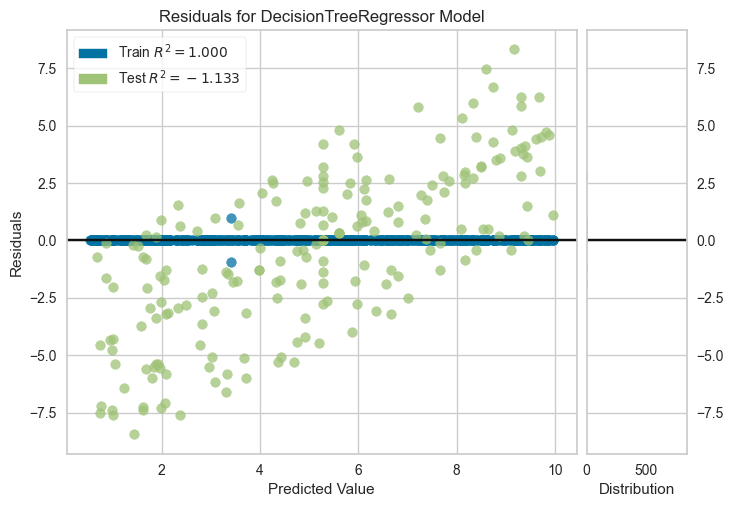

In [45]:
plot_model(best,plot="residuals")

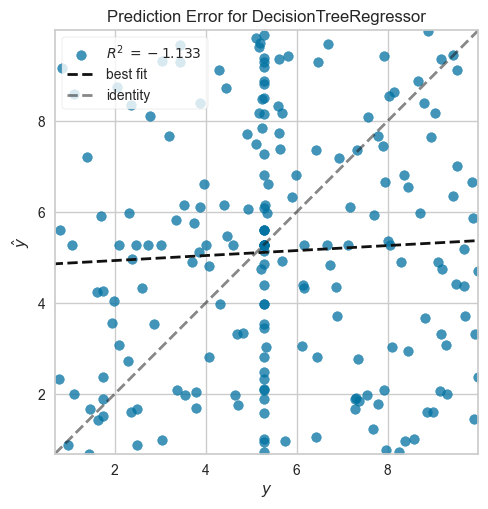

In [46]:
plot_model(best,plot="error")

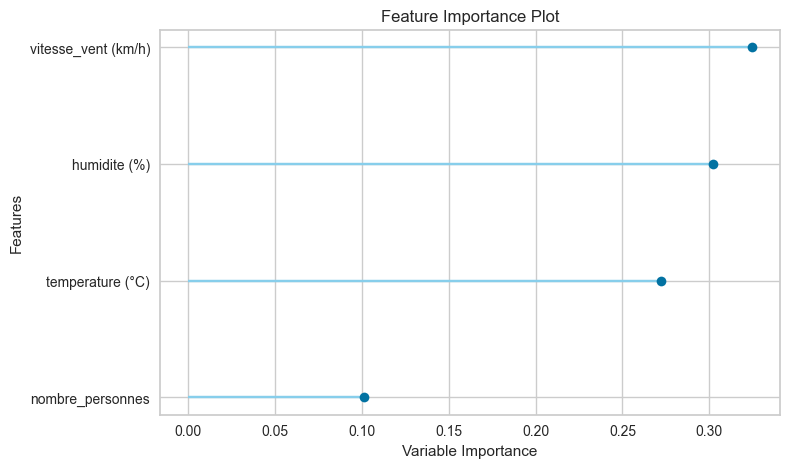

In [47]:
plot_model(best,plot="feature")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.2784,7.9541,2.8203,-0.2670,0.5199,0.7840
1,2.4941,8.6489,2.9409,-0.2552,0.5388,0.8305
2,2.4295,8.8729,2.9787,-0.3991,0.5571,0.8384
3,2.0749,6.6209,2.5731,-0.1795,0.5122,0.8695
4,2.7089,10.6952,3.2704,-0.5047,0.6031,0.9269
5,2.1247,7.0348,2.6523,-0.1000,0.5180,0.8466
6,2.5181,8.9245,2.9874,-0.2588,0.5951,1.1054
7,2.7088,10.0411,3.1688,-0.2529,0.5779,0.9803
8,2.2037,6.8358,2.6145,-0.3645,0.4873,0.7515


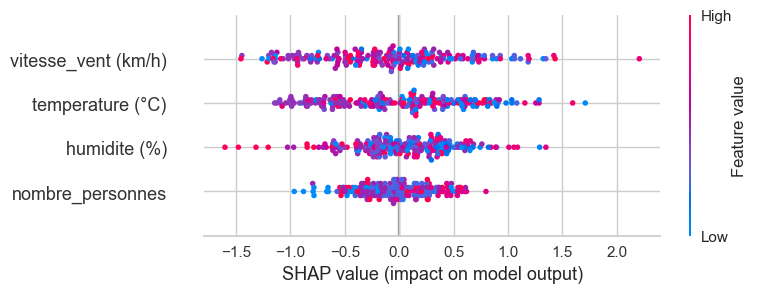

In [48]:
gbr = create_model('lightgbm')
interpret_model(gbr, plot = 'summary')

In [ ]:
#modele SVM

In [49]:
bm=create_model("svm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0569,6.7310,2.5944,-0.0722,0.4804,0.7126
1,2.2758,7.1644,2.6766,-0.0398,0.4889,0.7342
2,2.0718,6.5337,2.5561,-0.0303,0.5059,0.8160
3,1.9739,5.9449,2.4382,-0.0590,0.5044,0.8643
4,2.3975,8.2549,2.8731,-0.1614,0.5399,0.8808
5,2.0293,6.3868,2.5272,0.0013,0.5107,0.8906
6,2.2371,7.4768,2.7344,-0.0546,0.5606,1.0313
7,2.3527,7.9510,2.8197,0.0079,0.5456,0.9618
8,1.8163,5.1326,2.2655,-0.0245,0.4431,0.6530


In [24]:
tuned_lr = tune_model(bm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9861,6.1879,2.4875,-0.0703,0.4639,0.6598
1,2.1665,6.7444,2.5970,-0.0134,0.4937,0.7588
2,2.0893,6.5356,2.5565,-0.0569,0.5077,0.8286
3,2.2310,7.2664,2.6956,-0.0203,0.5515,0.9936
4,1.8782,5.6669,2.3805,-0.1128,0.4484,0.6673
5,2.5548,8.7554,2.9589,-0.0135,0.6047,1.2114
6,2.0483,6.3501,2.5199,0.0302,0.4876,0.7776
7,2.0402,6.4388,2.5375,-0.0806,0.4592,0.6904
8,1.9735,6.1692,2.4838,-0.0331,0.4933,0.8160


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [51]:
evaluate_model(bm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

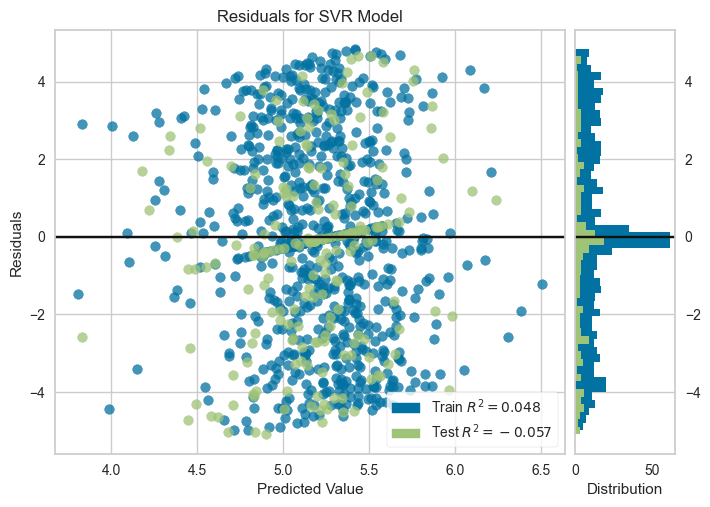

In [53]:
plot_model(bm,plot="residuals")

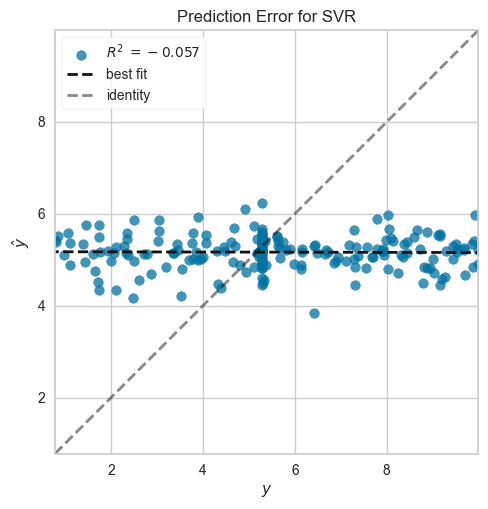

In [55]:
plot_model(bm,plot="error")

In [56]:
# tune dt using optuna
tuned_bm_opt = tune_model(bm, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0695,6.6796,2.5845,-0.0640,0.4820,0.7303
1,2.2717,7.0165,2.6489,-0.0183,0.4839,0.7248
2,2.0903,6.4532,2.5403,-0.0176,0.5023,0.8116
3,1.9866,6.0265,2.4549,-0.0736,0.5043,0.8617
4,2.4242,8.2954,2.8802,-0.1671,0.5414,0.8852
5,2.0360,6.2819,2.5064,0.0177,0.5075,0.8866
6,2.2640,7.4558,2.7305,-0.0517,0.5583,1.0232
7,2.3978,8.0984,2.8458,-0.0105,0.5446,0.9517
8,1.8500,5.3247,2.3075,-0.0629,0.4450,0.6475


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [57]:
save_model(bm, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['temperature (°C)', 'humidite (%)',
                                              'vitesse_vent (km/h)',
                                              'nombre_personnes'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model', SVR())]),
 'my_best_pipeline.pkl')

In [58]:
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=C:\Users\grace\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['temperature (°C)', 'humidite (%)',
                                             'vitesse_vent (km/h)',
                                             'nombre_personnes'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model', SVR())])
